<a href="https://colab.research.google.com/github/Zilch123/DemandForecast/blob/main/Product_Demand_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demand forecasting

Demand forecasting is the process of predicting what the demand for certain products will be in the future. This helps manufacturers to decide what they should produce and guides retailers toward what they should stock.

## Importing essential libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

import statsmodels.api as sm
get_ipython().run_line_magic('matplotlib', 'inline')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving Superstore.xls to Superstore (1).xls


## Dataset is opened using pandas

In [ ]:
dataset = pd.read_excel('Superstore.xls')
dataset.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
dataset.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [ ]:
dataset.shape

(9994, 21)

In [ ]:
dataset.corr()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Row ID,1.000000,0.009671,-0.001359,-0.004016,0.013480,0.012497
Postal Code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.001359,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,-0.004016,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.013480,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,0.012497,-0.029961,0.479064,0.066253,-0.219487,1.000000


In [ ]:
corr = dataset[['Quantity','Profit','Sales']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

,Quantity,Profit,Sales
Quantity,1.000,0.066,0.201
Profit,0.066,1.000,0.479
Sales,0.201,0.479,1.000


## Relation between Profit and Sales depicted in a Scatter graph

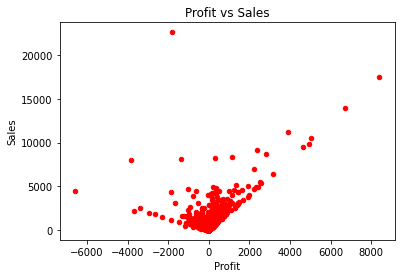

In [ ]:
dataset.plot.scatter(x='Profit', y='Sales',c='red', title='Profit vs Sales')
plt.show()

## Finding which are the types of products that they uses to sell

In [ ]:
set(dataset['Category'])

{'Furniture', 'Office Supplies', 'Technology'}

## Data Preprocessing

## We will first analyse the time series of Furniture Sales followed by other categories.

In [ ]:
furniture = dataset.loc[dataset['Category'] == 'Furniture']

print(furniture['Order Date'].min())
furniture['Order Date'].max()

2014-01-06 00:00:00


Timestamp('2017-12-30 00:00:00')

This shows that we have time-series data of 4 years for furniture sales.

Here we drops the unwanted columns of furiture sales

In [ ]:
furniture=furniture.drop(columns=['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City',
        'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity',
        'Discount', 'Profit'])

In [ ]:
furniture

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840
...,...,...
9962,2015-03-19,383.4656
9964,2016-12-05,13.4000
9980,2015-09-06,85.9800
9989,2014-01-21,25.2480


In [ ]:
furniture.sort_values('Order Date')
furniture.isna().sum()

Order Date    0
Sales         0
dtype: int64

In [ ]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

# ## Indexing time-series data 

In [ ]:
furniture = furniture.set_index('Order Date')
#furniture = furniture.apply(lambda x: x.set_index('Order Date'))
furniture.index


DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

## Averaging Daily Sales

In [ ]:
y = furniture['Sales'].resample('MS').mean()
y['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

## Furniture data time-series visualization

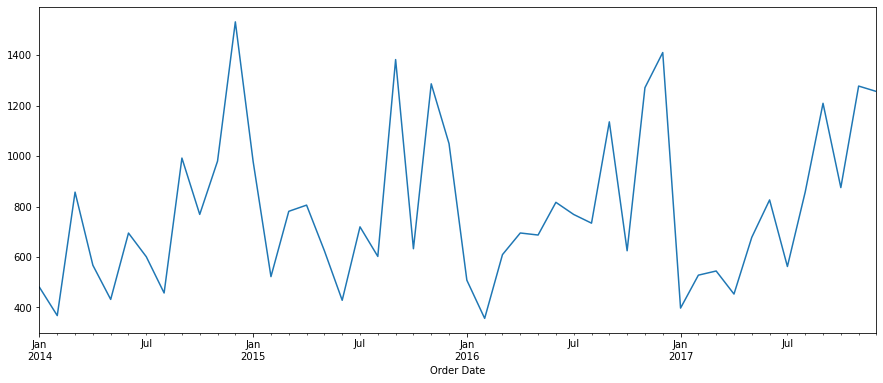

In [ ]:
y.plot(figsize=(15, 6))
plt.show()

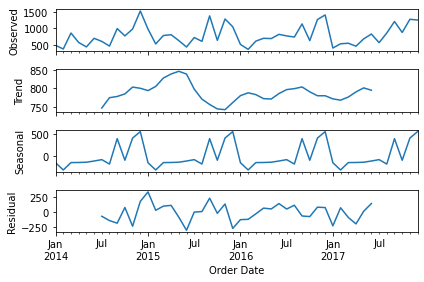

In [ ]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
decomposition.plot()
plt.show()

The above plot shows that the sales of furniture is highly unstable with seasonality and trend easily observable.

## Time Series forecasting with ARIMA Model


In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

print('Few parameter combinations are:')
print('{} x {}'.format(pdq[1], seasonal_pdq[1]))
print('{} x {}'.format(pdq[2], seasonal_pdq[2]))

Few parameter combinations are:
(0, 0, 1) x (0, 0, 1, 12)
(0, 1, 0) x (0, 1, 0, 12)


 Now that we've generated all possible parameters for our SARIMA model, we shall find out the best parameter to train the model on it finally. :)
 
**SARIMA** stands for **Seasonal AutoRegressive Integrated Moving Average** model which is an extension of ARIMA model used in modeling the seasonality component as well. So, we need not to make time-series stationary (non-seasonal) first before forecasting. 


In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = model.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
            

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:769.0817523205916
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1465.324747812899
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:477.71701309202774
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:497.2314433418337


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1251.9866263898775
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:318.0047199116341
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:720.9252270758102
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:2902.0056507195513
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:466.56074298091676


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:499.5702446844217
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:2400.364309996122
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:319.9884876946871
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:677.894766859465


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1467.7189761276309
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:486.63785671879367
ARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:497.78896630044073


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1024.367167837936
ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:319.7714068109211
ARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:649.9056176817456
ARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:2623.736390923739
ARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:458.8705548482636
ARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:486.1832977442739
ARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:2845.1395120221937
ARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:310.757436841719
ARIMA(1, 0, 0)x(0, 0, 0, 12) - AIC:692.1645522067712
ARIMA(1, 0, 0)x(0, 0, 1, 12) - AIC:1410.1149571960532
ARIMA(1, 0, 0)x(0, 1, 0, 12) - AIC:479.46321478521355


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 0, 12) - AIC:480.9259367935196


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12) - AIC:1114.2026757573515
ARIMA(1, 0, 0)x(1, 1, 0, 12) - AIC:304.46646750846014
ARIMA(1, 0, 1)x(0, 0, 0, 12) - AIC:665.7794442185216
ARIMA(1, 0, 1)x(0, 0, 1, 12) - AIC:326397302.97901773
ARIMA(1, 0, 1)x(0, 1, 0, 12) - AIC:468.36851958141426
ARIMA(1, 0, 1)x(1, 0, 0, 12) - AIC:482.57633238769296


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC:nan
ARIMA(1, 0, 1)x(1, 1, 0, 12) - AIC:306.0156002152007
ARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:671.2513547541902


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1377.701968220998
ARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:479.2003422281135
ARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:475.3403658784892


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1451.3058168699715
ARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:300.6270901345398
ARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:649.0318019835429


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:nan
ARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:460.4762687609859
ARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:469.5250354660892


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:nan
ARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:297.7875439536804




 We got the lowest AIC value: 297.788 for ARIMA(1, 1, 1)x(1, 1, 0, 12). We shall use these best params in our model.


## Training the ARIMA model.

In [ ]:
model = sm.tsa.statespace.SARIMAX(y, order=(1, 1, 1), seasonal_order=(1, 1, 0, 12),enforce_invertibility=False)
results = model.fit()
print(results.summary().tables[1])


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0676      0.226      0.299      0.765      -0.376       0.511
ma.L1         -1.0000      0.279     -3.590      0.000      -1.546      -0.454
ar.S.L12      -0.4807      0.147     -3.260      0.001      -0.770      -0.192
sigma2      4.108e+04   6.78e-06   6.06e+09      0.000    4.11e+04    4.11e+04


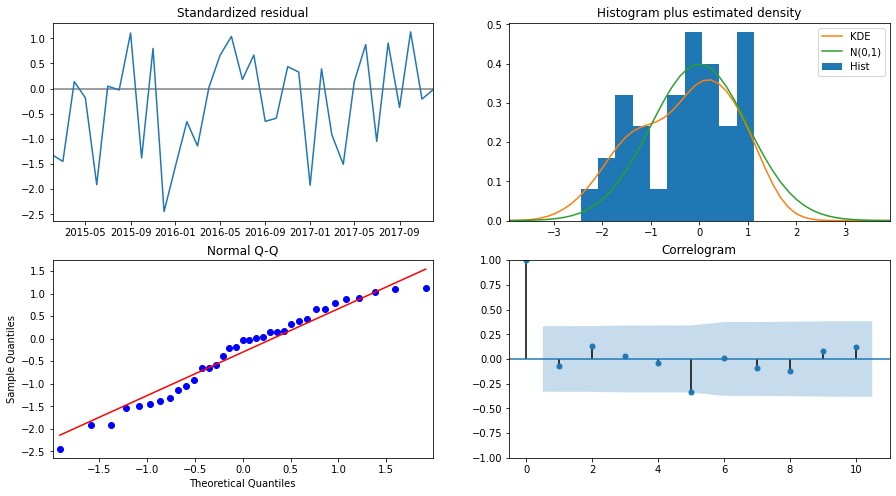

In [ ]:
results.plot_diagnostics(figsize=(15, 8))
plt.show()

The above plots suggest that the Model Residuals are nearly Normally Distributed.

## Validating the model forecasts

            lower Sales  upper Sales
Order Date                          
2017-01-01   389.646989  1208.010186
2017-02-01    38.031069   855.042122
2017-03-01   327.688591  1143.492559
2017-04-01   358.593429  1173.313211
2017-05-01   242.636934  1056.377569
2017-06-01   238.706979  1051.558944
2017-07-01   373.986941  1186.028723
2017-08-01   265.185584  1076.485712
2017-09-01   881.882327  1692.500988
2017-10-01   237.610724  1047.601063
2017-11-01   916.397120  1725.806298
2017-12-01   856.640841  1665.510901


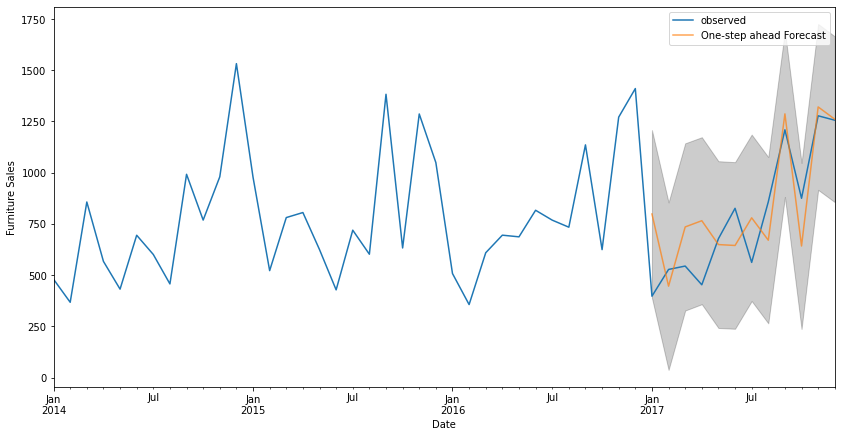

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
print(pred_ci)
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

The above plot demonstrates that the predicted values alligns well with the true values capturing an upward seasonality. Now, we calculate the Mean Square Error of our predicted values wrt the orignal values.


In [ ]:
y_predicted = pred.predicted_mean
y_true = y['2017-01-01':]
mse = ((y_predicted - y_true)**2).mean()
print('Mean Square Error is:', round(mse, 4))
print('Root Mean Square Error is:', np.sqrt(mse))


Mean Square Error is: 39996.0102
Root Mean Square Error is: 199.99002532507694


## Forecasting the future (out of sample) values.

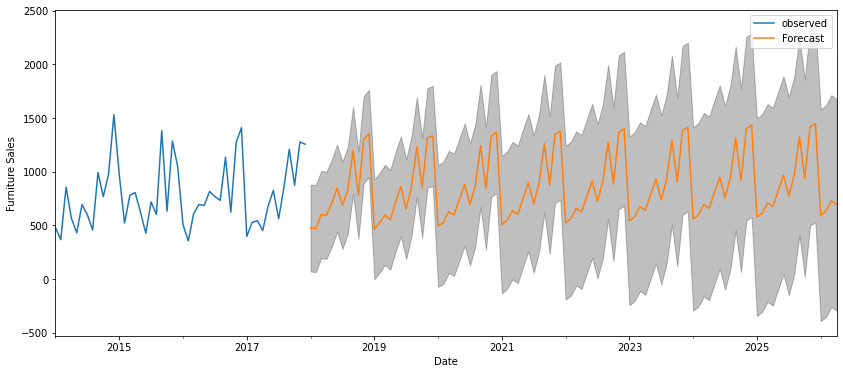

In [ ]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()


## Future Forecasts

Here, note that the confidence interval is increasing as we move further into the future. The model becomes less confident in predicting the values as we move ahead.

Our data has 3 categories: 'Furniture', 'Office Supplies' and, 'Technology'. Let's compare the 'Furniture' and 'Office Supplies' time series.

## Furniture vs Office Supplies

In [ ]:
furniture = dataset.loc[dataset['Category'] == 'Furniture']
office = dataset.loc[dataset['Category'] == 'Office Supplies']
furniture.shape, office.shape


((2121, 21), (6026, 21))

In [ ]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)

furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')

furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()

furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')

y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()

furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Merging both the time series for comparison.

In [ ]:
store = furniture.merge(office, on='Order Date', how='inner')
store.rename(columns={'Sales_x': 'Furniture Sales', 'Sales_y': 'Office Sales'}, inplace=True)
store.head()



,Order Date,Furniture Sales,Office Sales
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049188,324.346545


## Visualizing Furniture vs Office Sales time series

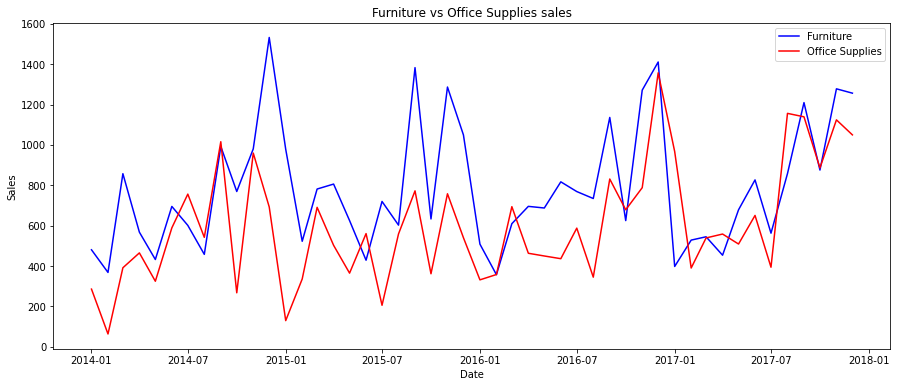

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(store['Order Date'], store['Furniture Sales'], label='Furniture',c='blue')
plt.plot(store['Order Date'], store['Office Sales'], label='Office Supplies',c='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Furniture vs Office Supplies sales')
plt.legend()

The above plot clearly shows that both furniture and office supplies exhibit similar seasonality component.
 The sales are generally low at the beginning of every year as evident from decreasing line slope at the onset of year 2014, 2015, 2016 etc. 
 Also, monthly average sales of furniture is higher than that of office supplies. It's probably because cost of furniture is much more as compared to office utilities.
 But there are few instances in the time series where office supply sales surpass furniture. It is mainly in **July 2014** for the first time in the dataset.


 

## Furniture vs Office Sales vs Technology

In [ ]:

technology = dataset.loc[dataset['Category'] == 'Technology']
furniture.shape, office.shape, technology.shape

((48, 2), (48, 2), (1847, 21))

Technology products is having less sales than both furniture and office sales,So we need to merge other products into technologies timeline

In [ ]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
technology.drop(cols, axis=1, inplace=True)

technology=technology.sort_values('Order Date')

technology=technology.groupby('Order Date')['Sales'].sum().reset_index()

technology=technology.set_index('Order Date')

y_technology=technology['Sales'].resample('MS').mean()

technology=pd.DataFrame({'Order Date':y_technology.index,'Sales':y_technology.values})


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
finalstore = technology.merge(store, on='Order Date', how='inner')
finalstore.rename(columns={'Sales': 'Technology Sales'}, inplace=True)
finalstore.head()


,Order Date,Technology Sales,Furniture Sales,Office Sales
0,2014-01-01,449.041429,480.194231,285.357647
1,2014-02-01,229.787143,367.931600,63.042588
2,2014-03-01,2031.948375,857.291529,391.176318
3,2014-04-01,613.028933,567.488357,464.794750
4,2014-05-01,564.698588,432.049188,324.346545


## Visualizing Technology vs Furniture vs Office Sales time series

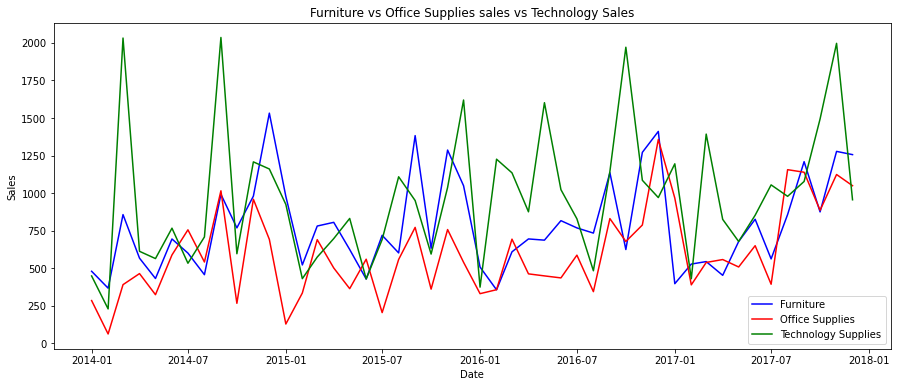

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(finalstore['Order Date'], finalstore['Furniture Sales'], label='Furniture',c='blue')
plt.plot(finalstore['Order Date'], finalstore['Office Sales'], label='Office Supplies',c='red')
plt.plot(finalstore['Order Date'], finalstore['Technology Sales'], label='Technology Supplies',c='green')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Furniture vs Office Supplies sales vs Technology Sales')
plt.legend()